# Get data

In [28]:
import requests
import zipfile
from pathlib import Path
import os
import matplotlib.pyplot as plt
import random
import numpy as np
from PIL import Image

# computer deep learning libraries
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)


    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        requests = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        f.write(requests.content)

    # Unzip pizza, steak, sushi data
        with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
            print("Unzipping pizza, steak, sushi data...") 
            zip_ref.extractall(image_path)



# Become one with data

In [8]:
# check how many images and folders are there by walking through the data
for dirpath, dirnames, filenames in os.walk(image_path, topdown=True):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [10]:
train_dir = image_path / "train"
test_dir = image_path / "test"


(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

#### Visualise Image


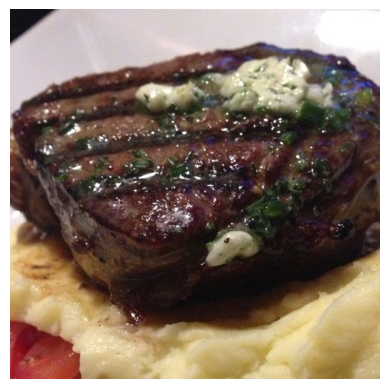

The shape of the image is (512, 512, 3)


In [26]:
torch.manual_seed(42)

# get all image paths
images_list = list(image_path.glob('*/*/*.jpg'))

# get a random path
random_image_path = random.choice(images_list)

# load the image
img = Image.open(random_image_path)

# convert the laoded image to numpyarray
np_array_image = np.asarray(img)

# plot the image 
plt.imshow(np_array_image)
plt.axis(False);
plt.show()

print(f"The shape of the image is {np_array_image.shape}")



# Transform Data

I've got folders of images but before I can use them with PyTorch, will need to convert them into tensors.

One of the ways to do this is by using the torchvision.transforms module.

torchvision.transforms contains many pre-built methods for formatting images, turning them into tensors and even manipulating them for data augmentation.

To get experience with torchvision.transforms, a series of transform steps that I would like to perform are:
<ul>
<li>Resize the images using transforms.Resize() (from about 512x512 to 64x64, the same shape as the images on the CNN Explainer website).</li>
<li>Flip the images randomly on the horizontal using transforms.RandomHorizontalFlip() (this could be considered a form of data augmentation because it will artificially change our image data).</li>
<li>Turn  images from a PIL image to a PyTorch tensor using transforms.ToTensor().</li>
<li>I can compile all of these steps using torchvision.transforms.Compose().</li>
</ul>

In [29]:
data_transformations = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [31]:
train_data = datasets.ImageFolder(root=train_dir, transform=data_transformations, target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transformations)

In [49]:
# get class names and indexes
class_names = train_data.classes
class_dict = train_data.class_to_idx

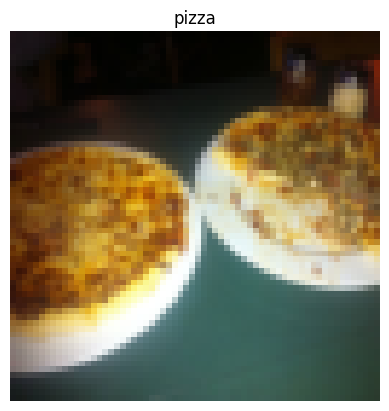

In [77]:
# Here the image is of dimension (C,H,W) to plot using matplot we need to change it to (H,W,C). 
# Cannot just queeze because squeeze can only remove all dimesnions of imput size 1. 
img, label = train_data[0]
img_permute = img.permute(1,2,0)
plt.imshow(img_permute)
plt.title(class_names[label])
plt.axis(False);
plt.show()

# DataLoader

In [78]:
train_dataloader = DataLoader(dataset=train_data, batch_size=32, num_workers=1, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=32, num_workers=1, shuffle=False)